In [3]:
import networkx as nx

from utilities import create_network, export_network, import_networks

from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import lukes_partitioning

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

import json

In [4]:
networks = [create_network(year) for year in range(2018,2022)]
for n in networks:
    export_network(n)

# ↓↓↓ Isto são testes ↓↓↓
 
---

In [4]:
networks = import_networks()

In [6]:
networks[0].graph

{'node_default': {}, 'edge_default': {}, 'year': 2018}

In [16]:
comp = girvan_newman(G,lambda x: max(nx.edge_betweenness_centrality(x, weight='weight')))
tuple(c for c in next(comp))

KeyboardInterrupt: 

In [185]:
G.number_of_nodes()

1065

In [17]:
for c in communities:
    print(len(c))

1064
1


In [21]:
list(nx.bridges(G))

[('1202_9803', '3042_L175')]

In [41]:
a = nx.betweenness_centrality(G, weight='weight')

In [42]:
G.nodes[max(a,key=a.get)],a[max(a,key=a.get)]

({'candidates': 2377,
  'faculty_name': 'Universidade de Coimbra: Faculdade de Direito',
  'faculty_type': 'universidade',
  'name': 'Direito'},
 0.007195738855040254)

In [36]:
a[max(a)]

0.00043731029501939856

Text(0, 0.5, 'Frequency')

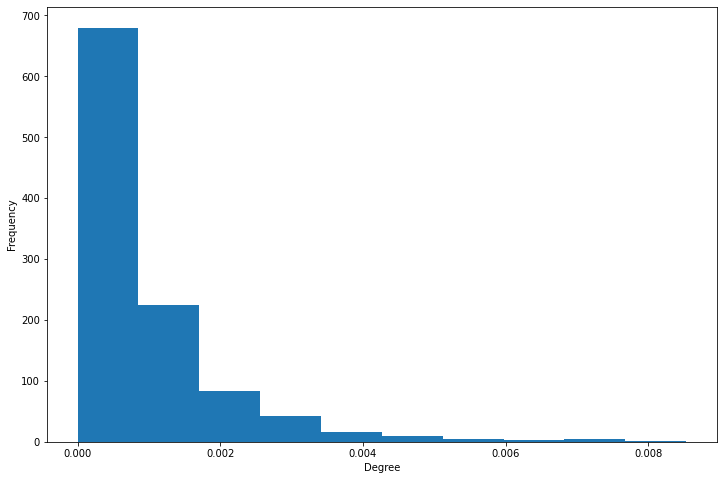

In [37]:
degree_freq = [G.degree(n,weight='weight') for n in G.nodes()]
# print(degree_freq)
degree_freq = [x/sum(degree_freq) for x in degree_freq]
degree_cum = [sum(degree_freq[i:]) for i in range(len(degree_freq))]
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
# plt.loglog(degrees[3:], degree_cum[3:],'o', markersize=1) 
plt.hist(degree_freq)
plt.xlabel('Degree')
plt.ylabel('Frequency')

11295


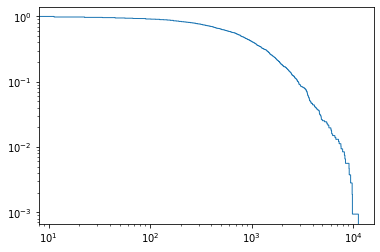

In [74]:
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
print(max(degrees))
# degrees = [n/sum(degrees) for n in degrees]
# degrees = np.histogram(degrees,bins = 100)
plt.xscale('log')
plt.hist(degrees,bins=1000,log=True,cumulative=-1,density=True, histtype='step')
plt.show()

In [10]:
nx.algorithms.assortativity.degree_assortativity_coefficient(G,weight='weight')


0.11793736373317022

In [214]:
nx.algorithms.assortativity.attribute_assortativity_coefficient(G,'grade')

-0.0006720306705427048

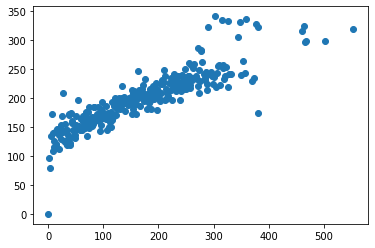

In [29]:
a = nx.algorithms.assortativity.average_degree_connectivity(G,weight='weight')
plt.plot(a.keys(),a.values(),'o')

In [23]:
a = [d['candidates'] for d in courses]
print(np.average([d['candidates'] for d in courses]), np.std(a))
print(min(a), max(a))

286.31775700934577 326.1137035277939
0 2394


In [17]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True) # used for degree distribution and powerlaw test

In [25]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 
fit.power_law.alpha

Calculating best minimal value for power law fit


3.834231388525514

<AxesSubplot:>

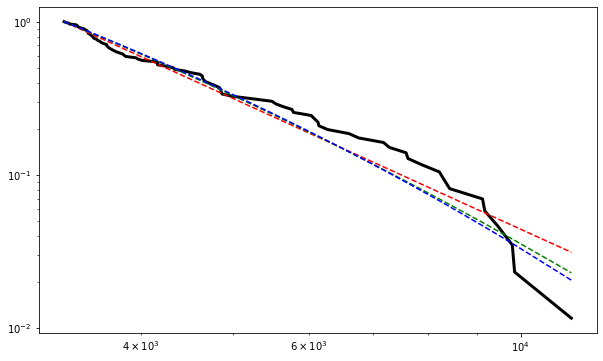

In [20]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential

In [67]:
from networkx.algorithms.community import greedy_modularity_communities

In [116]:
%%time
c = list(greedy_modularity_communities(G,weight='weight',resolution=2))
len(c)

CPU times: user 5.78 s, sys: 0 ns, total: 5.78 s
Wall time: 5.79 s


19

In [114]:
t = list(c[0])
[G.nodes[x]['name'] for x in t]

[285, 208, 188, 163, 85, 65, 39, 7, 6, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


['Engenharia Química',
 'Engenharia Biomédica e Biofísica',
 'Engenharia Automóvel',
 'Engenharia Informática',
 'Engenharia Eletrónica e Telecomunicações',
 'Engenharia Informática',
 'Gestão (ensino em Inglês)',
 'Engenharia Informática',
 'Engenharia Eletrotécnica',
 'Engenharia de Telecomunicações e Informática',
 'Matemática Aplicada',
 'Matemática Aplicada à Tecnologia e à Empresa',
 'Engenharia Eletrotécnica e de Computadores',
 'Informática de Gestão',
 'Engenharia Eletrotécnica e de Computadores',
 'Meteorologia, Oceanografia e Geofísica',
 'Engenharia Eletrotécnica e de Computadores',
 'Engenharia Física',
 'Ciência de Dados',
 'Engenharia Mecânica',
 'Engenharia Informática (regime pós-laboral)',
 'Engenharia Civil',
 'Matemática e Aplicações',
 'Matemática',
 'Engenharia Mecânica',
 'Economia (ensino em Inglês)',
 'Engenharia e Gestão Industrial',
 'Engenharia de Energias Renováveis',
 'Engenharia Física',
 'Engenharia Civil',
 'Engenharia Biomédica',
 'Engenharia Mecânica'

In [54]:
a = [x for x in G.edges() if G.edges[x]['weight'] > 50]
len(a)

2354

In [7]:
F = G.copy()

In [33]:
F = G.copy()
F.edges[list(F.edges())[0]]
F.remove_edges_from([v for v in G.edges(data=True) if v[2]["weight"] < 20])
F.number_of_edges()

6506

In [34]:
%%time
comp = girvan_newman(F,lambda x: max(nx.edge_betweenness_centrality(x, weight='weight_1')))

CPU times: user 196 µs, sys: 0 ns, total: 196 µs
Wall time: 210 µs


In [35]:
%%time
comp = tuple(c for c in next(comp))

CPU times: user 30min 10s, sys: 58.2 ms, total: 30min 10s
Wall time: 30min 12s


In [36]:
print(len(comp))
print([len(c) for c in comp])

179
[1, 885, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Modularity per year

In [37]:
from networkx.algorithms.community import greedy_modularity_communities

In [39]:
nws = [create_network(x) for x in range(2018,2022)]

In [140]:
%%time
c = [list(greedy_modularity_communities(g,weight='weight',resolution=3)) for g in nws]
[len(g) for g in c]

CPU times: user 29.2 s, sys: 0 ns, total: 29.2 s
Wall time: 29.3 s


[18, 22, 19, 20]

In [141]:
c = [[list(x) for x in y] for y in c]

In [142]:
communities = []
for c_year,nw in zip(c,nws):
    communities.append([[(x,nw.nodes[x]['name'])  for x in comm if nw.nodes[x]] for comm in c_year])

In [143]:
communities[0][-1]

[('1307_A011', 'Engenharia Eletrónica e Telecomunicações (ensino em inglês)'),
 ('1306_9720', 'Comunicação, Cultura e Organizações'),
 ('1321_9076', 'Direção e Gestão Hoteleira'),
 ('1308_9081', 'Economia'),
 ('1307_9119', 'Engenharia Informática'),
 ('1307_9015', 'Bioquímica'),
 ('1308_9853', 'Educação Básica'),
 ('1308_9026', 'Ciências da Educação'),
 ('1306_L150', 'Estudos de Cultura'),
 ('1306_9196', 'Línguas e Relações Empresariais'),
 ('1307_A012', 'Matemática (ensino em inglês)'),
 ('1308_9147', 'Gestão'),
 ('1307_A010', 'Engenharia Civil (ensino em inglês)')]

In [149]:
grades = []
for c_year,nw in zip(c,nws):
    grades.append([[nw.nodes[x]['grade']  for x in comm if nw.nodes[x]] for comm in c_year])

In [158]:
av_grade = []
for c_year in grades:
    av_grade.append([sum(x)/len(x) for x in c_year])
av_grade

[[130.75779816513753,
  125.04942528735627,
  131.80681818181816,
  114.29487179487177,
  127.408,
  120.99565217391303,
  137.43970588235297,
  123.75373134328358,
  130.5234375,
  130.21129032258065,
  125.88545454545456,
  131.12884615384615,
  145.88124999999997,
  115.63571428571429,
  156.11818181818182,
  113.33333333333334,
  176.03571428571425,
  129.43846153846155],
 [130.86698113207552,
  126.81951219512194,
  132.3024096385542,
  130.92615384615385,
  123.41267605633804,
  117.29117647058827,
  134.57536231884058,
  140.5765625,
  118.87656249999996,
  138.64999999999995,
  117.21555555555553,
  126.29473684210528,
  127.66052631578948,
  151.3575757575758,
  120.625,
  159.52272727272725,
  116.28461538461539,
  116.40624999999999,
  177.2642857142857,
  155.10714285714286,
  134.66666666666666,
  105.6],
 [135.92735042735038,
  142.15463917525776,
  133.6612903225806,
  139.80000000000004,
  148.4421052631579,
  121.07534246575345,
  140.5986301369863,
  131.7863636363636

In [159]:
communities[-1][-1]

[('1309_8083', 'Ciclo Básico de Medicina'),
 ('1113_9548', 'Medicina Dentária'),
 ('0506_9548', 'Medicina Dentária'),
 ('0400_9813', 'Medicina'),
 ('0506_9813', 'Medicina'),
 ('0160_8083', 'Ciclo Básico de Medicina'),
 ('1110_9813', 'Medicina'),
 ('1508_9548', 'Medicina Dentária'),
 ('1108_9813', 'Medicina'),
 ('0901_9813', 'Medicina'),
 ('1000_9813', 'Medicina'),
 ('1507_9813', 'Medicina')]

In [177]:
[x['grade'] for _,x in G.nodes(data=True) if x]

[144.8,
 170.4,
 116.4,
 134.2,
 112.8,
 135.8,
 135.0,
 147.9,
 130.1,
 128.1,
 117.4,
 141.2,
 182.8,
 163.5,
 105.4,
 123.7,
 119.3,
 127.2,
 118.4,
 134.4,
 128.5,
 127.7,
 113.3,
 109.7,
 158.8,
 103.0,
 130.9,
 134.7,
 144.2,
 144.2,
 140.0,
 136.1,
 156.7,
 110.7,
 122.5,
 118.4,
 105.8,
 147.4,
 130.3,
 152.1,
 147.4,
 162.0,
 147.8,
 171.0,
 171.0,
 176.8,
 140.0,
 168.4,
 162.0,
 136.8,
 186.4,
 170.3,
 126.0,
 137.0,
 139.0,
 128.8,
 118.2,
 166.6,
 113.0,
 160.0,
 167.8,
 155.3,
 149.2,
 150.5,
 122.6,
 168.8,
 141.2,
 147.6,
 154.0,
 146.6,
 140.8,
 118.0,
 147.2,
 166.0,
 129.6,
 148.8,
 149.7,
 143.8,
 139.7,
 163.6,
 158.4,
 148.3,
 128.3,
 139.0,
 164.6,
 146.6,
 146.0,
 132.9,
 145.7,
 117.8,
 165.1,
 125.3,
 125.4,
 123.5,
 124.3,
 127.2,
 112.5,
 143.1,
 157.5,
 117.8,
 128.9,
 134.5,
 183.2,
 126.8,
 162.1,
 124.8,
 139.6,
 136.5,
 148.5,
 156.5,
 164.0,
 152.0,
 170.5,
 120.0,
 116.8,
 131.8,
 154.8,
 124.8,
 158.3,
 144.0,
 143.8,
 133.3,
 147.0,
 121.0,
 134.0,


In [207]:
[x['grade'] for _,x in G.nodes(data=True) ]

[170.4,
 116.4,
 141.2,
 123.7,
 103.0,
 144.2,
 136.1,
 122.5,
 140.0,
 139.7,
 128.1,
 138.0,
 127.7,
 95.0,
 172.6,
 170.0,
 148.8,
 187.5,
 179.8,
 141.2,
 176.5,
 162.0,
 190.3,
 181.0,
 141.4,
 175.1,
 169.5,
 148.0,
 175.8,
 127.0,
 116.3,
 126.5,
 105.8,
 128.5,
 142.2,
 117.9,
 158.2,
 123.0,
 105.0,
 117.7,
 113.3,
 97.0,
 154.6,
 147.0,
 174.0,
 129.8,
 139.1,
 144.8,
 140.0,
 156.7,
 143.8,
 164.6,
 156.5,
 164.0,
 156.2,
 141.7,
 160.4,
 165.4,
 169.3,
 147.1,
 127.1,
 166.0,
 163.2,
 126.6,
 149.5,
 164.4,
 130.6,
 151.8,
 166.4,
 151.8,
 159.0,
 182.8,
 109.7,
 162.0,
 171.0,
 171.0,
 176.8,
 166.0,
 164.0,
 168.5,
 185.2,
 168.2,
 149.0,
 122.3,
 137.0,
 184.5,
 178.0,
 175.0,
 187.8,
 166.5,
 165.0,
 180.5,
 188.2,
 184.8,
 172.0,
 128.1,
 143.9,
 136.8,
 142.5,
 183.5,
 149.5,
 182.8,
 156.5,
 159.5,
 119.4,
 116.2,
 132.3,
 134.3,
 151.8,
 133.2,
 124.5,
 156.0,
 158.4,
 168.2,
 123.2,
 160.4,
 160.6,
 172.5,
 153.4,
 163.4,
 150.8,
 169.7,
 167.6,
 159.5,
 160.6,
 1